In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager
f_path = 'C:\Windows\Fonts\gulim.ttc'
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False #마이너스 부호로 한글 꺠짐 방지
rc('font', family='gulim')
%matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")



In [4]:

# 지수 분포의 파라미터 설정


[0.486582880967408,
 0.2498199809168653,
 0.128261854879114,
 0.06585183201381117,
 0.03380945787554912,
 0.017358354458518188,
 0.008912076337239005,
 0.004575612557663811,
 0.0023491978171650274,
 0.0012061183753265814]

In [26]:
def set_range(start, end, interval_range):
    # range 대신 interval_range 사용
    intervals = [(i, min(i + interval_range, end)) for i in range(start, end, interval_range)]
    return intervals

set_range(0, 100, 10)


[(0, 10),
 (10, 20),
 (20, 30),
 (30, 40),
 (40, 50),
 (50, 60),
 (60, 70),
 (70, 80),
 (80, 90),
 (90, 100)]

In [33]:
def get_interval_game_probability(input_mean_value=15,start=0,end=100,interval_range=10):
    
    lambda_param = 1 / input_mean_value
    
    int_ranges=set_range(start,end,interval_range)

    exp_probabilities = []
    
    for (start, end) in int_ranges:
        # 각 구간의 누적확률분포 값 차이를 이용하여 확률을 계산함
        prob = (1 - np.exp(-lambda_param * end)) - (1 - np.exp(-lambda_param * start))
        exp_probabilities.append(prob)

    # 각 구간별 필요 시행 횟수를 구함
    trials = get_num_trials(exp_probabilities)

    return exp_probabilities,trials


get_interval_game_probability(input_mean_value=20,start=0,end=100,interval_range=10)

([0.3934693402873666,
  0.2386512185411911,
  0.14474928102301254,
  0.08779487691181709,
  0.05325028461271386,
  0.03229793025603489,
  0.01958968494554547,
  0.01188174453358426,
  0.007206642350491954,
  0.0043710495391567905],
 [2.5414940825367984,
  4.190215353236927,
  6.908497181695969,
  11.390186252034043,
  18.7792423509647,
  30.961736311668123,
  51.04727323485575,
  84.16272519354857,
  138.76087522669084,
  228.77800652721675])

In [32]:
#시행횟수를 모델링
def get_num_trials(exp_probabilities):
    expected_trials = [1/p if p > 0 else float('inf') for p in exp_probabilities]  # p가 0일 경우, 무한대로 설정
    return expected_trials

In [35]:
class gotcha():
    def __init__(self,start,end,interval_range,input_mean_value):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value

    def set_range(self):
        # range 대신 interval_range 사용
        intervals = [(i, min(i + interval_range, end)) for i in range(start, end, interval_range)]
        return intervals
    
    def get_num_trials(self,exp_probabilities):
        expected_trials = [1/p if p > 0 else float('inf') for p in exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_interval_game_probability(self):
        
        lambda_param = 1 / self.input_mean_value
        
        int_ranges=set_range(self.start,self.end,self.interval_range)

        exp_probabilities = []
        
        for (self.start, self.end) in int_ranges:
            # 각 구간의 누적확률분포 값 차이를 이용하여 확률을 계산함
            prob = (1 - np.exp(-lambda_param * self.end)) - (1 - np.exp(-lambda_param * self.start))
            exp_probabilities.append(prob)

        # 각 구간별 필요 시행 횟수를 구함
        trials = get_num_trials(exp_probabilities)

        return exp_probabilities,trials


    get_interval_game_probability(input_mean_value=20,start=0,end=100,interval_range=10)

In [57]:
import numpy as np

class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_num_trials(self, exp_probabilities):
        expected_trials = [1/p if p > 0 else float('inf') for p in exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_interval_game_probability(self):
        lambda_param = 1 / self.input_mean_value
        int_ranges = self.set_range()
        exp_probabilities = []

        for (interval_start, interval_end) in int_ranges:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        trials = self.get_num_trials(exp_probabilities)
        return int_ranges,exp_probabilities, trials

gotcha_game = Gotcha(start=0, end=100, interval_range=10, input_mean_value=20)
interval_range,exp_probabilities, trials = gotcha_game.get_interval_game_probability()

df = pd.DataFrame(index=interval_range,data={'p':exp_probabilities,'t':trials})
df

,p,t
"(0, 10)",0.393469,2.541494
"(10, 20)",0.238651,4.190215
"(20, 30)",0.144749,6.908497
"(30, 40)",0.087795,11.390186
"(40, 50)",0.053250,18.779242
"(50, 60)",0.032298,30.961736
"(60, 70)",0.019590,51.047273
"(70, 80)",0.011882,84.162725
"(80, 90)",0.007207,138.760875
"(90, 100)",0.004371,228.778007


지수분포 모델링

In [157]:
import numpy as np
import pandas as pd

class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.exp_probabilities = self.get_exp_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self):
        win_counts = np.zeros(len(self.bonus_range))

        for _ in range(self.num_simulations):
            for i, prob in enumerate(self.exp_probabilities):
                if np.random.rand() < prob:
                    win_counts[i] += 1
        
        # intervals = [f"{start}-{end}" for start, end in self.bonus_range]
        win_rates = win_counts / self.num_simulations

        return win_counts,win_rates

# 인스턴스 생성 및 시뮬레이션 실행하긔

gotcha_game = Gotcha(start=5, end=100, interval_range=10, input_mean_value=17, num_simulations=10000)

profit_range = gotcha_game.set_range()
each_probability = gotcha_game.get_exp_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()
win_counts,win_rates = gotcha_game.get_simulated_result()

# 표로 정리하깅
df = pd.DataFrame({
    'range':profit_range,
    'probability':each_probability,
    'trials_need':num_of_trials_needs,
    'sim_win_counts':win_counts,
    'sim_win_rates':win_rates,
    'sim_profit':win_counts * win_rates
    })

## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
mid_points = [(start + end) / 2 for start, end in profit_range]
sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

df['range_mid'] = mid_points
df['sim_profit'] = sim_profit

total_expected_payout = np.sum(sim_profit)
print("총 지급액: ",total_expected_payout)
df


총 지급액:  166600.0


,range,probability,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(5, 15)",0.331381,3.017677,3291.0,0.3291,32910.0,10.0
1,"(15, 25)",0.184018,5.434256,1816.0,0.1816,36320.0,20.0
2,"(25, 35)",0.102186,9.786050,979.0,0.0979,29370.0,30.0
3,"(35, 45)",0.056745,17.622795,628.0,0.0628,25120.0,40.0
4,"(45, 55)",0.031511,31.735265,317.0,0.0317,15850.0,50.0
5,"(55, 65)",0.017498,57.149111,165.0,0.0165,9900.0,60.0
6,"(65, 75)",0.009717,102.914559,112.0,0.0112,7840.0,70.0
7,"(75, 85)",0.005396,185.329333,61.0,0.0061,4880.0,80.0
8,"(85, 95)",0.002996,333.742492,36.0,0.0036,3240.0,90.0
9,"(95, 100)",0.000953,1048.869043,12.0,0.0012,1170.0,97.5


총 지급액:  1423690.0


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp_probability,gamma_probability,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(10, 20)",0.25,0.12,4.05,58326.00,0.12,874890.00,15.00
1,"(20, 30)",0.14,0.04,7.29,21952.00,0.04,548800.00,25.00
2,"(30, 40)",0.08,0.00,13.13,0.00,0.00,0.00,35.00
3,"(40, 50)",0.04,0.00,23.65,0.00,0.00,0.00,45.00
4,"(50, 60)",0.02,0.00,42.59,0.00,0.00,0.00,55.00
5,"(60, 70)",0.01,0.00,76.69,0.00,0.00,0.00,65.00
6,"(70, 80)",0.01,0.00,138.11,0.00,0.00,0.00,75.00
7,"(80, 90)",0.00,0.00,248.70,0.00,0.00,0.00,85.00
8,"(90, 100)",0.00,0.00,447.86,0.00,0.00,0.00,95.00


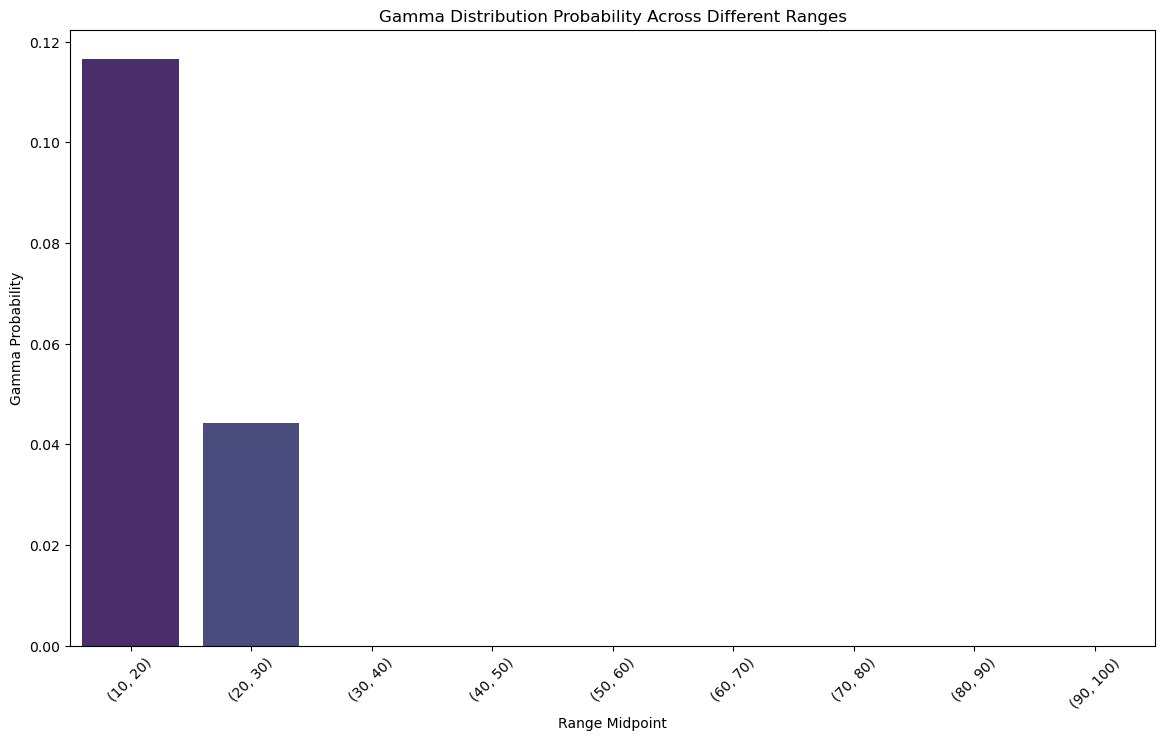

In [268]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
pd.options.display.float_format = '{:.2f}'.format


class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations, alpha):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.alpha = alpha  # 감마 분포의 모양 매개변수
        self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.exp_probabilities = self.get_exp_distribution_probability()
        self.gamma_probabilities = self.get_gamma_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_gamma_distribution_probability(self):
            gamma_probabilities = []

            for (interval_start, interval_end) in self.bonus_range:
                mid_point = (interval_start + interval_end) / 2
                # 감마 분포의 누적분포함수(CDF)를 사용하여 구간별 확률 계산
                prob = gamma.cdf(mid_point, self.alpha, scale=1/self.beta) - gamma.cdf(interval_start, self.alpha, scale=1/self.beta)
                gamma_probabilities.append(prob)

            return gamma_probabilities
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self):
        win_counts = np.zeros(len(self.bonus_range))

        for _ in range(self.num_simulations):
            # for i, prob in enumerate(self.exp_probabilities):
            for i, prob in enumerate(self.gamma_probabilities):
                if np.random.rand() < prob:
                    win_counts[i] += 1
        
        # intervals = [f"{start}-{end}" for start, end in self.bonus_range]
        win_rates = win_counts / self.num_simulations

        return win_counts,win_rates

# 인스턴스 생성 및 시뮬레이션 실행하긔

gotcha_game = Gotcha(start=10, end=100, interval_range=10, input_mean_value=17, num_simulations=500000,alpha=100)

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()
win_counts,win_rates = gotcha_game.get_simulated_result()

# 표로 정리하깅
df = pd.DataFrame({
    'range':profit_range,
    'exp_probability':exp_probability,
    'gamma_probability':gamma_probability,
    'trials_need':num_of_trials_needs,
    'sim_win_counts':win_counts,
    'sim_win_rates':win_rates,
    'sim_profit':win_counts * win_rates
    })

## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
mid_points = [(start + end) / 2 for start, end in profit_range]
sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

df['range_mid'] = mid_points
df['sim_profit'] = sim_profit

total_expected_payout = np.sum(sim_profit)
print("총 지급액: ",total_expected_payout)

##
plt.figure(figsize=(14, 8))
sns.barplot(x='range', y='gamma_probability', data=df, palette='viridis')
plt.title('Gamma Distribution Probability Across Different Ranges')
plt.xlabel('Range Midpoint')
plt.ylabel('Gamma Probability')
plt.xticks(rotation=45)  # x축 레이블 회전

df

로그노멀분포

In [40]:
a = 0
for i,prob in enumerate(lognorm_probabilities):
    a += prob
a
np.zeros(len(profit_range))


a

0.20161648118702102

In [31]:
profit_range = gotcha_game.set_range()
lognorm_probabilities = gotcha_game.get_lognorm_distribution_probability()

num_simulations=10000

def get_simulated_result():
    
    win_counts = np.zeros(len(profit_range))  # 각 구간별 당첨 횟수를 저장할 배열

    for _ in range(num_simulations):
        random_prob = np.random.random()
        

    return win_counts, win_rates

win_counts, win_rates = get_simulated_result()
len(win_counts)
sum(win_counts)

2017.0

총 지급액:  5585900.0
총 시행:  500000.0
평균 지급액:  11.1718


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp_probability,gamma_probability,lognorm_probability,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(5, 10)",0.238651,1.917643e-01,5.394461e-01,4.190215,190598.0,0.381196,1429485.0,7.5
1,"(10, 15)",0.144749,2.564986e-01,4.434756e-01,6.908497,255845.0,0.511690,3198062.5,12.5
2,"(15, 20)",0.087795,4.974939e-02,1.651510e-02,11.390186,49528.0,0.099056,866740.0,17.5
3,"(20, 25)",0.053250,3.891943e-03,1.799941e-04,18.779242,3840.0,0.007680,86400.0,22.5
4,"(25, 30)",0.032298,1.804152e-04,1.413084e-06,30.961736,186.0,0.000372,5115.0,27.5
5,"(30, 35)",0.019590,5.954678e-06,1.105661e-08,51.047273,3.0,0.000006,97.5,32.5
6,"(35, 40)",0.011882,1.548938e-07,9.737988e-11,84.162725,0.0,0.000000,0.0,37.5
7,"(40, 45)",0.007207,3.378501e-09,1.009193e-12,138.760875,0.0,0.000000,0.0,42.5
8,"(45, 50)",0.004371,6.435119e-11,1.243450e-14,228.778007,0.0,0.000000,0.0,47.5
9,"(50, 55)",0.002651,1.100786e-12,2.220446e-16,377.191166,0.0,0.000000,0.0,52.5


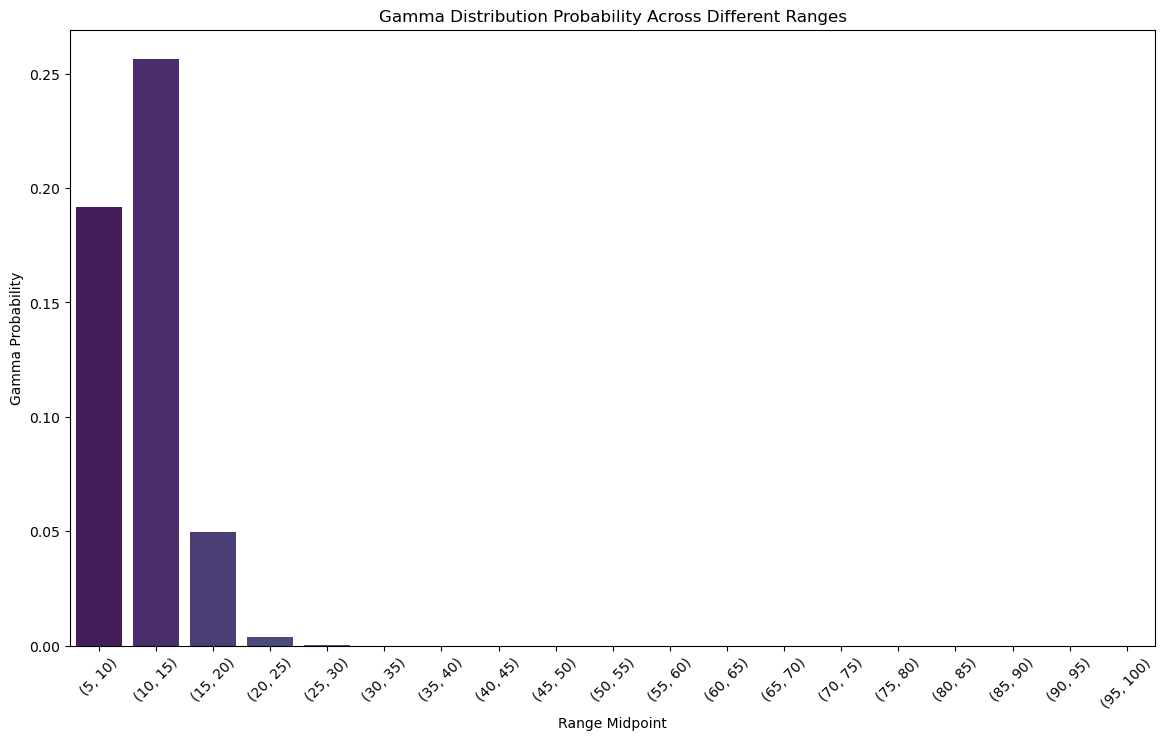

In [119]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.stats import lognorm
# pd.options.display.float_format = '{:.2f}'.format


class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations, alpha,sigma):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.alpha = alpha  # 감마 분포의 모양 매개변수
        self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.sigma = sigma  # 로그-노멀 분포의 형태 매개변수
        # 로그-노멀 분포의 mu 값을 계산합니다. 평균을 input_mean_value로 유지하려면,
        # mu는 다음과 같이 계산됩니다.
        self.mu = np.log(input_mean_value) - (sigma ** 2) / 2
        self.bonus_range = self.set_range()
        self.lognorm_probability = self.get_lognorm_distribution_probability()
        self.exp_probabilities = self.get_exp_distribution_probability()
        self.gamma_probabilities = self.get_gamma_distribution_probability()
        self.lognorm_probability = self.get_lognorm_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_gamma_distribution_probability(self):
            gamma_probabilities = []

            for (interval_start, interval_end) in self.bonus_range:
                mid_point = (interval_start + interval_end) / 2
                # 감마 분포의 누적분포함수(CDF)를 사용하여 구간별 확률 계산
                prob = gamma.cdf(mid_point, self.alpha, scale=1/self.beta) - gamma.cdf(interval_start, self.alpha, scale=1/self.beta)
                gamma_probabilities.append(prob)

            return gamma_probabilities
    
    def get_lognorm_distribution_probability(self):
            lognorm_probability = []
            # scipy의 lognorm은 scale 파라미터로 e^mu를 받습니다.
            for (interval_start, interval_end) in self.bonus_range:
                prob = lognorm.cdf(interval_end, self.sigma, scale=np.exp(self.mu)) - \
                    lognorm.cdf(interval_start, self.sigma, scale=np.exp(self.mu))
                lognorm_probability.append(prob)
            return lognorm_probability
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self):
        win_counts = np.zeros(len(self.bonus_range))

        # 확률을 정규화하여 모든 확률의 합이 1이 되도록 만듭니다.
        total_prob = sum(self.gamma_probabilities)
        normalized_probs = [prob / total_prob for prob in self.gamma_probabilities]

        for _ in range(self.num_simulations):
            # 0과 1 사이에서 랜덤 값을 생성합니다.
            random_value = np.random.random()
            cumulative_prob = 0

            # 생성된 랜덤 값이 어느 구간에 속하는지 확인합니다.
            for i, prob in enumerate(normalized_probs):
                cumulative_prob += prob
                if random_value <= cumulative_prob:
                    win_counts[i] += 1
                    break

        # 당첨 비율을 계산합니다.
        win_rates = win_counts / self.num_simulations

        return win_counts, win_rates


# 인스턴스 생성 및 시뮬레이션 실행하긔

gotcha_game = Gotcha(start=5, end=100, interval_range=5, input_mean_value=10, num_simulations=500000,alpha=10,sigma=0.2)

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()
win_counts,win_rates = gotcha_game.get_simulated_result()

# 표로 정리하깅
df = pd.DataFrame({
    'range':profit_range,
    'exp_probability':exp_probability,
    'gamma_probability':gamma_probability,
    'lognorm_probability':lognorm_probability,
    'trials_need':num_of_trials_needs,
    'sim_win_counts':win_counts,
    'sim_win_rates':win_rates,
    'sim_profit':win_counts * win_rates
    })

## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
mid_points = [(start + end) / 2 for start, end in profit_range]
sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

df['range_mid'] = mid_points
df['sim_profit'] = sim_profit

total_expected_payout = np.sum(sim_profit)

print("총 지급액: ",total_expected_payout)
print("총 시행: ",df.sim_win_counts.sum())
print("평균 지급액: ",total_expected_payout/df.sim_win_counts.sum())


##
plt.figure(figsize=(14, 8))
sns.barplot(x='range', y='gamma_probability', data=df, palette='viridis')
plt.title('Gamma Distribution Probability Across Different Ranges')
plt.xlabel('Range Midpoint')
plt.ylabel('Gamma Probability')
plt.xticks(rotation=45)  # x축 레이블 회전

df


여기까지 진행됨 : 성공 로그노말

총 지급액:  8993700.0
총 시행:  500000.0
평균 지급액:  17.9874


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp_probability,gamma_probability,lognorm_probability,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(5, 10)",0.183712,9.955751e-03,2.263231e-03,5.443311,1176.0,0.002352,8820.0,7.5
1,"(10, 15)",0.139155,1.072055e-01,2.062451e-01,7.186220,103946.0,0.207892,1299325.0,12.5
2,"(15, 20)",0.105405,1.813721e-01,5.260973e-01,9.487196,262572.0,0.525144,4595010.0,17.5
3,"(20, 25)",0.079841,1.271439e-01,2.246856e-01,12.524928,111771.0,0.223542,2514847.5,22.5
4,"(25, 30)",0.060477,5.342711e-02,3.673304e-02,16.535319,18527.0,0.037054,509492.5,27.5
5,"(30, 35)",0.045809,1.607944e-02,3.668148e-03,21.829810,1832.0,0.003664,59540.0,32.5
6,"(35, 40)",0.034699,3.826917e-03,2.862000e-04,28.819557,165.0,0.000330,6187.5,37.5
7,"(40, 45)",0.026283,7.653640e-04,1.990958e-05,38.047371,9.0,0.000018,382.5,42.5
8,"(45, 50)",0.019908,1.338593e-04,1.328927e-06,50.229865,2.0,0.000004,95.0,47.5
9,"(50, 55)",0.015080,2.104615e-05,8.876376e-08,66.313106,0.0,0.000000,0.0,52.5


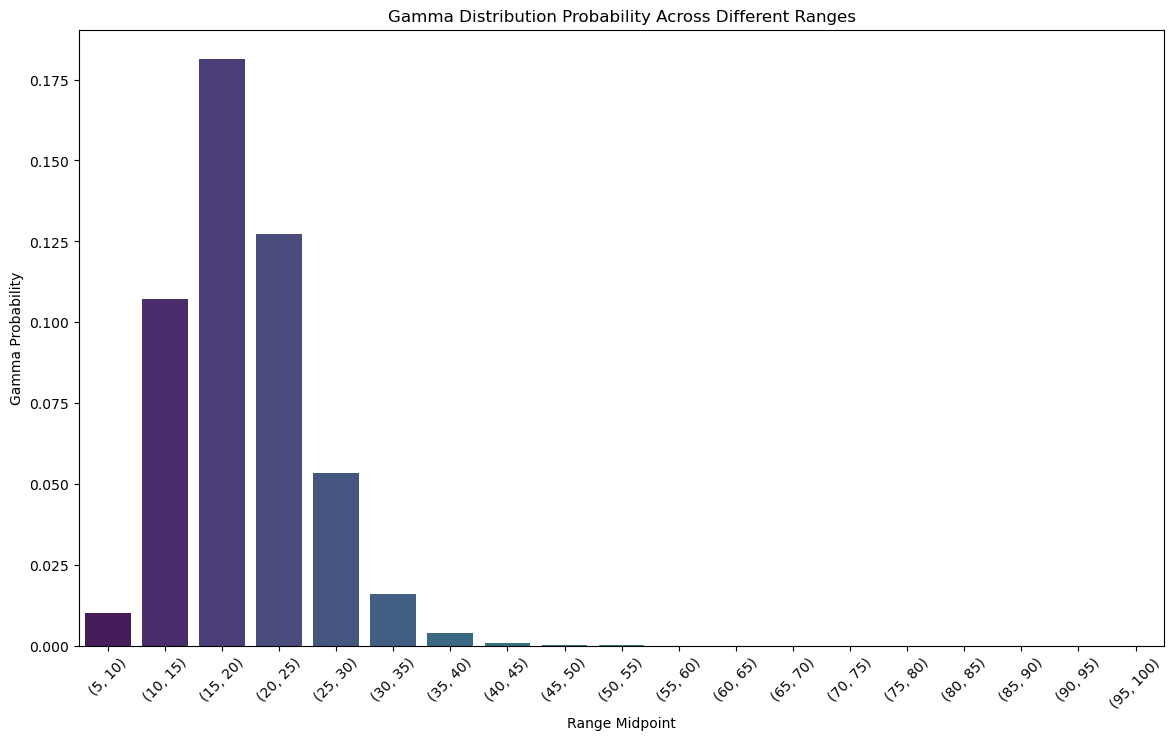

In [283]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.stats import lognorm
# pd.options.display.float_format = '{:.2f}'.format


class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations, alpha,sigma):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.alpha = alpha  # 감마 분포의 모양 매개변수
        self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.sigma = sigma  # 로그-노멀 분포의 형태 매개변수
        # 로그-노멀 분포의 mu 값을 계산합니다. 평균을 input_mean_value로 유지하려면,
        # mu는 다음과 같이 계산됩니다.
        self.mu = np.log(input_mean_value) - (sigma ** 2) / 2
        self.bonus_range = self.set_range()
        self.lognorm_probability = self.get_lognorm_distribution_probability()
        self.exp_probabilities = self.get_exp_distribution_probability()
        self.gamma_probabilities = self.get_gamma_distribution_probability()
        self.lognorm_probability = self.get_lognorm_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_gamma_distribution_probability(self):
            gamma_probabilities = []

            for (interval_start, interval_end) in self.bonus_range:
                mid_point = (interval_start + interval_end) / 2
                # 감마 분포의 누적분포함수(CDF)를 사용하여 구간별 확률 계산
                prob = gamma.cdf(mid_point, self.alpha, scale=1/self.beta) - gamma.cdf(interval_start, self.alpha, scale=1/self.beta)
                gamma_probabilities.append(prob)

            return gamma_probabilities
    
    def get_lognorm_distribution_probability(self):
            lognorm_probability = []
            # scipy의 lognorm은 scale 파라미터로 e^mu를 받습니다.
            for (interval_start, interval_end) in self.bonus_range:
                prob = lognorm.cdf(interval_end, self.sigma, scale=np.exp(self.mu)) - \
                    lognorm.cdf(interval_start, self.sigma, scale=np.exp(self.mu))
                lognorm_probability.append(prob)
            return lognorm_probability
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self):
        win_counts = np.zeros(len(self.bonus_range))

        # 로그-노멀 확률을 정규화합니다.
        total_prob = sum(self.lognorm_probability)
        normalized_probs = [prob / total_prob for prob in self.lognorm_probability]

        for _ in range(self.num_simulations):
            # 0과 1 사이에서 랜덤 값을 생성합니다.
            random_value = np.random.random()
            cumulative_prob = 0

            # 생성된 랜덤 값이 어느 구간에 속하는지 확인합니다.
            for i, prob in enumerate(normalized_probs):
                cumulative_prob += prob
                if random_value <= cumulative_prob:
                    win_counts[i] += 1
                    break

        # 각 구간별 당첨 비율을 계산합니다.
        win_rates = win_counts / self.num_simulations

        return win_counts, win_rates



# 인스턴스 생성 및 시뮬레이션 실행하긔

gotcha_game = Gotcha(start=5, end=100, interval_range=5, input_mean_value=18, num_simulations=500000,alpha=10,sigma=0.2)

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()
win_counts,win_rates = gotcha_game.get_simulated_result()

# 표로 정리하깅
df = pd.DataFrame({
    'range':profit_range,
    'exp_probability':exp_probability,
    'gamma_probability':gamma_probability,
    'lognorm_probability':lognorm_probability,
    'trials_need':num_of_trials_needs,
    'sim_win_counts':win_counts,
    'sim_win_rates':win_rates,
    'sim_profit':win_counts * win_rates
    })

## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
mid_points = [(start + end) / 2 for start, end in profit_range]
sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

df['range_mid'] = mid_points
df['sim_profit'] = sim_profit

total_expected_payout = np.sum(sim_profit)

print("총 지급액: ",total_expected_payout)
print("총 시행: ",df.sim_win_counts.sum())
print("평균 지급액: ",total_expected_payout/df.sim_win_counts.sum())


##
plt.figure(figsize=(14, 8))
sns.barplot(x='range', y='gamma_probability', data=df, palette='viridis')
plt.title('Gamma Distribution Probability Across Different Ranges')
plt.xlabel('Range Midpoint')
plt.ylabel('Gamma Probability')
plt.xticks(rotation=45)  # x축 레이블 회전

df


## 확정

1
총 지급액:  9010084.0
총 시행:  500000.0
평균 지급액:  18.020168


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


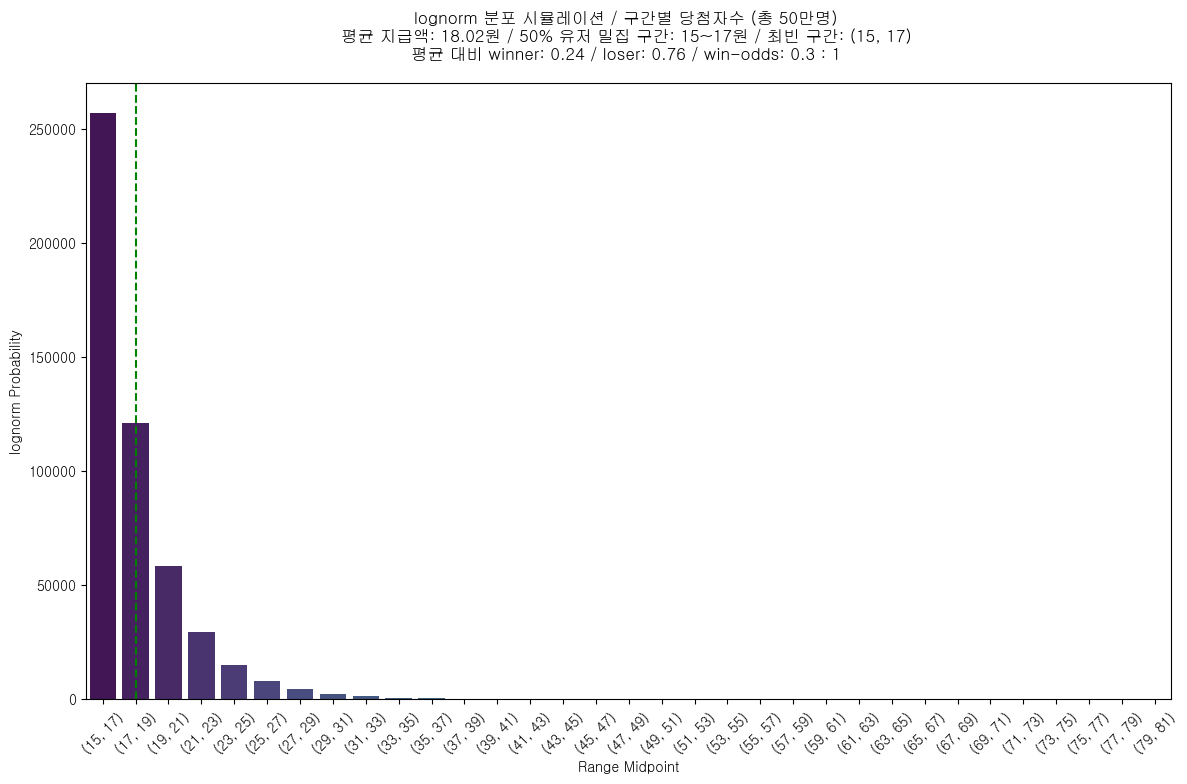

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.stats import lognorm
# pd.options.display.float_format = '{:.2f}'.format


class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations, alpha,sigma):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.alpha = alpha  # 감마 분포의 모양 매개변수
        # self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.sigma = sigma  # 로그-노멀 분포의 형태 매개변수
        # 로그-노멀 분포의 mu 값을 계산합니다. 평균을 input_mean_value로 유지하려면,
        # mu는 다음과 같이 계산됩니다.
        self.mu = np.log(input_mean_value) - (sigma ** 2) / 2
        self.bonus_range = self.set_range()
        self.lognorm_probability = self.get_lognorm_distribution_probability()
        self.exp_probabilities = self.get_exp_distribution_probability()
        self.gamma_probabilities = self.get_gamma_distribution_probability()
        self.lognorm_probability = self.get_lognorm_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_gamma_distribution_probability(self):
            gamma_probabilities = []

            for (interval_start, interval_end) in self.bonus_range:
                mid_point = (interval_start + interval_end) / 2
                # 감마 분포의 누적분포함수(CDF)를 사용하여 구간별 확률 계산
                prob = gamma.cdf(mid_point, self.alpha, scale=1/self.beta) - gamma.cdf(interval_start, self.alpha, scale=1/self.beta)
                gamma_probabilities.append(prob)

            return gamma_probabilities
    
    def get_lognorm_distribution_probability(self):
            lognorm_probability = []
            # scipy의 lognorm은 scale 파라미터로 e^mu를 받습니다.
            for (interval_start, interval_end) in self.bonus_range:
                prob = lognorm.cdf(interval_end, self.sigma, scale=np.exp(self.mu)) - \
                    lognorm.cdf(interval_start, self.sigma, scale=np.exp(self.mu))
                lognorm_probability.append(prob)
            return lognorm_probability
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self, distribution_key):
        win_counts = np.zeros(len(self.bonus_range))
        
        # 분포 선택
        if distribution_key == 'exp':
            probabilities = self.exp_probabilities
        elif distribution_key == 'gamma':
            probabilities = self.gamma_probabilities
        elif distribution_key == 'lognorm':
            probabilities = self.lognorm_probability
        else:
            raise ValueError("Invalid distribution key. Choose 'exp', 'gamma', or 'lognorm'.")

        # 확률을 정규화.
        total_prob = sum(probabilities)
        normalized_probs = [prob / total_prob for prob in probabilities]

        for _ in range(self.num_simulations):
            # 0과 1 사이에서 랜덤 값을 생성
            random_value = np.random.random()
            cumulative_prob = 0

            # 생성된 랜덤 값이 어느 구간에 속하는지 확인
            for i, prob in enumerate(normalized_probs):
                cumulative_prob += prob
                if random_value <= cumulative_prob:
                    win_counts[i] += 1
                    break

        # 당첨 비율을 계산
        win_rates = win_counts / self.num_simulations

        return win_counts, win_rates

### 클래스 외, 실행 영역

### 시뮬레이션 진행
def get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist):
    # 표로 정리하깅
    df = pd.DataFrame({
        'range':profit_range,
        'exp':exp_probability,
        'gamma':gamma_probability,
        'lognorm':lognorm_probability,
        'trials_need':num_of_trials_needs,
        'sim_win_counts':win_counts,
        'sim_win_rates':win_rates,
        'sim_profit':win_counts * win_rates
        })

    ## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
    mid_points = [(start + end) / 2 for start, end in profit_range]
    sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

    df['range_mid'] = mid_points
    df['sim_profit'] = sim_profit

    total_expected_payout = np.sum(sim_profit)
    mean_payout = round(total_expected_payout/df.sim_win_counts.sum(),2)
    winners_counts = round(df[df['range_mid']>=mean_payout].sim_win_counts.sum())
    losers_counts = round(df.sim_win_counts.sum() - winners_counts)
    closest_index = np.abs(df['range_mid'] - mean_payout).idxmin()
    print(closest_index)
    print("총 지급액: ",total_expected_payout)
    print("총 시행: ",df.sim_win_counts.sum())
    print("평균 지급액: ",total_expected_payout/df.sim_win_counts.sum())

    # 최다분포 확률구간 검색 함수 실행
    min_range, max_range,min_range_key,max_range_key, high_prob_interval = find_central_range(profit_range, df[sim_dist].tolist())
    # min_range_low, max_range_high = min(min_range), max(max_range)
    min_range_key = df[df['range']==min_range_key].index.values[0]
    max_range_key = df[df['range']==max_range_key].index.values[0]

    plt.figure(figsize=(14, 8))
    plt.fill_betweenx(y=[0, max(df['sim_win_counts'])], x1=min_range_key, x2=max_range_key, color='red', alpha=0.1)
    sns.barplot(x='range', y='sim_win_counts', data=df, palette='viridis')
    plt.title(f'{sim_dist} 분포 시뮬레이션 / 구간별 당첨자수 (총 {round(df.sim_win_counts.sum().astype(int) / 10000)}만명) \n'
            f'평균 지급액: {round(total_expected_payout/df.sim_win_counts.sum(), 2)}원 / 50% 유저 밀집 구간: {min_range}~{max_range}원 / 최빈 구간: {high_prob_interval} \n'
            f'평균 대비 winner: {round(winners_counts/df.sim_win_counts.sum(), 2)} / loser: {round(losers_counts/df.sim_win_counts.sum(), 2)} / win-odds: {round((winners_counts/df.sim_win_counts.sum())/(losers_counts/df.sim_win_counts.sum()), 1)} : 1 \n')

    plt.xlabel('Range Midpoint')
    plt.ylabel(f'{sim_dist} Probability')

    plt.axvline(x=closest_index, color='g', linestyle='--')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.savefig(f'평균 지급액-{round(total_expected_payout/df.sim_win_counts.sum(), 2)}원_과반수-{min_range}-{max_range}원_최빈구간-{high_prob_interval}.png',dpi=300)

    return df

#######
### 최다분포 확률구간 검색
def find_central_range(intervals, probabilities):
    # 확률을 내림차순으로 정렬
    sorted_prob_indices = sorted(range(len(probabilities)), key=lambda k: probabilities[k], reverse=True)
    
    # 정렬된 확률을 사용하여 중앙 50% 구간 계산
    total_prob = sum(probabilities)
    half_prob = total_prob / 2
    accumulated_prob = 0
    central_range_indices = []

    for i in sorted_prob_indices:
        accumulated_prob += probabilities[i]
        central_range_indices.append(i)
        if accumulated_prob >= half_prob:
            break  # 누적 확률이 50%를 넘으면 종료

    # 중심 구간의 최소값과 최대값 찾기
    min_index = min(central_range_indices)
    max_index = max(central_range_indices)
    min_range = intervals[min_index][0]  # 최소 구간의 최소값
    max_range = intervals[max_index][1]  # 최대 구간의 최대값
    
    # 가장 확률이 높은 구간 찾기
    high_prob_index = probabilities.index(max(probabilities))
    high_prob_interval = intervals[high_prob_index]

    return min_range, max_range, intervals[min_index], intervals[max_index], high_prob_interval
######

#### 클래스 인스턴스 생성 및 시뮬레이션 실행라인
# 매개변수 정의
gotcha_game = Gotcha(start=15, end=81, interval_range=2, 
                     input_mean_value=5, #exp & all
                     num_simulations=500000,
                     alpha=8,#gamma
                     sigma=0.5 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

sim_dist = 'lognorm' #'exp', 'gamma','lognorm'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

### 클래스 인스턴스 외, 실행 라인

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)


4
총 지급액:  9173542.0
총 시행:  500000.0
평균 지급액:  18.347084


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


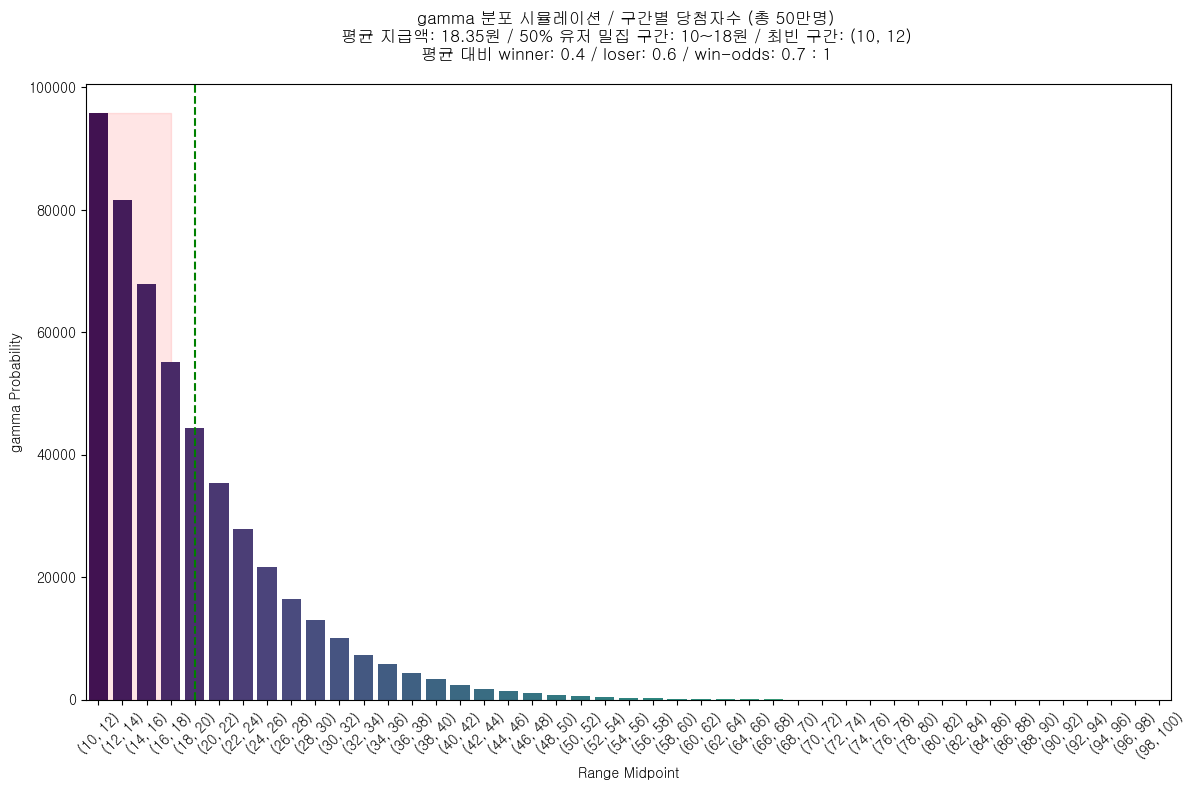

In [270]:
gotcha_game = Gotcha(start=10, end=100, interval_range=2, 
                     input_mean_value=12, #exp & all
                     num_simulations=500000,
                     alpha=2,#gamma
                     sigma=10 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'gamma'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)

# df

1
총 지급액:  9336400.0
총 시행:  500000.0
평균 지급액:  18.6728


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp,gamma,lognorm,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(9, 14)",1.261582e-01,0.054447,5.398042e-06,7.926556e+00,215397.0,0.430794,2477065.5,11.5
1,"(14, 19)",5.482812e-02,0.029376,3.077455e-06,1.823881e+01,116777.0,0.233554,1926820.5,16.5
2,"(19, 24)",2.382820e-02,0.016794,2.046833e-06,4.196707e+01,66628.0,0.133256,1432502.0,21.5
3,"(24, 29)",1.035570e-02,0.009911,1.484674e-06,9.656522e+01,39215.0,0.078430,1039197.5,26.5
4,"(29, 34)",4.500567e-03,0.005968,1.138859e-06,2.221942e+02,23751.0,0.047502,748156.5,31.5
5,"(34, 39)",1.955938e-03,0.003644,9.084878e-07,5.112636e+02,14322.0,0.028644,522753.0,36.5
6,"(39, 44)",8.500472e-04,0.002248,7.460406e-07,1.176405e+03,8979.0,0.017958,372628.5,41.5
7,"(44, 49)",3.694290e-04,0.001397,6.264885e-07,2.706880e+03,5564.0,0.011128,258726.0,46.5
8,"(49, 54)",1.605532e-04,0.000874,5.355236e-07,6.228466e+03,3472.0,0.006944,178808.0,51.5
9,"(54, 59)",6.977612e-05,0.000550,4.644349e-07,1.433155e+04,2195.0,0.004390,124017.5,56.5


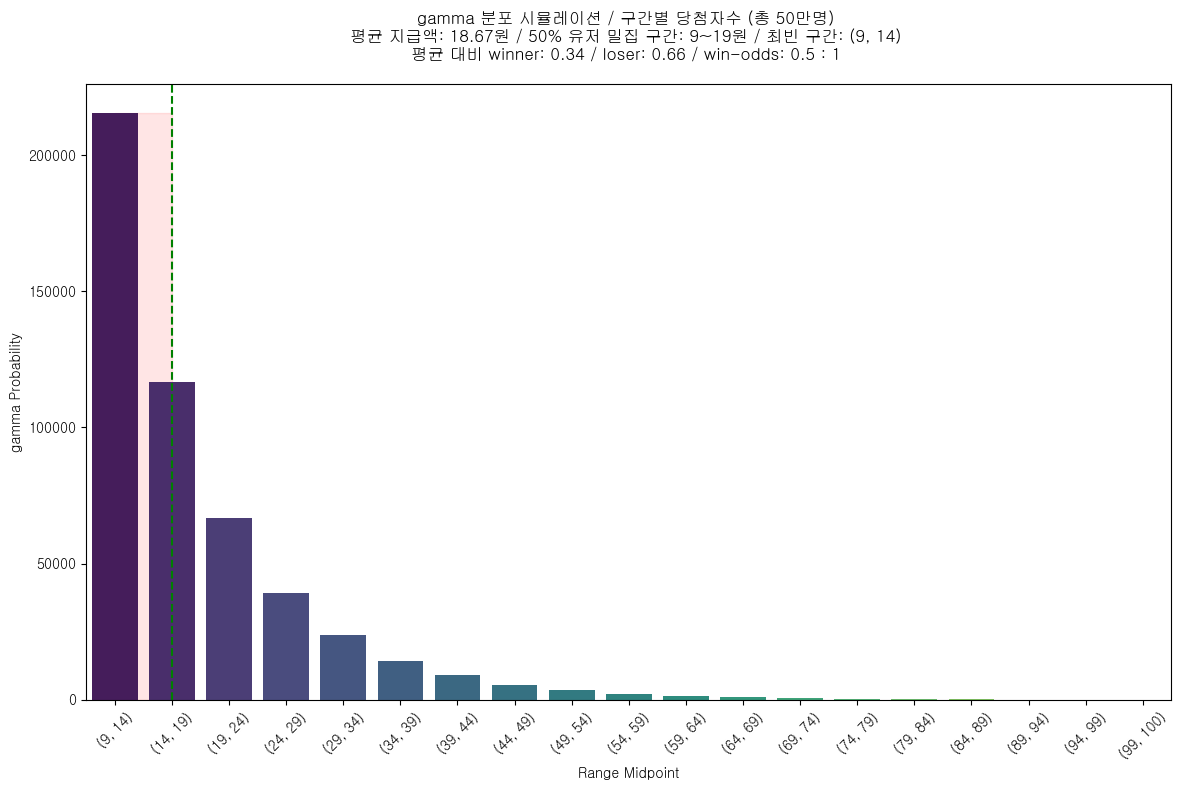

In [271]:
gotcha_game = Gotcha(start=9, end=100, interval_range=5, 
                     input_mean_value=6, #exp & all
                     num_simulations=500000,
                     alpha=0.5,#gamma
                     sigma=8 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'gamma'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)

df

### 챌린지 보상 시뮬레이션

50 ~ 150, 중간구간 가중치

22
총 지급액:  47264312.0
총 시행:  500000.0
평균 지급액:  94.528624


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


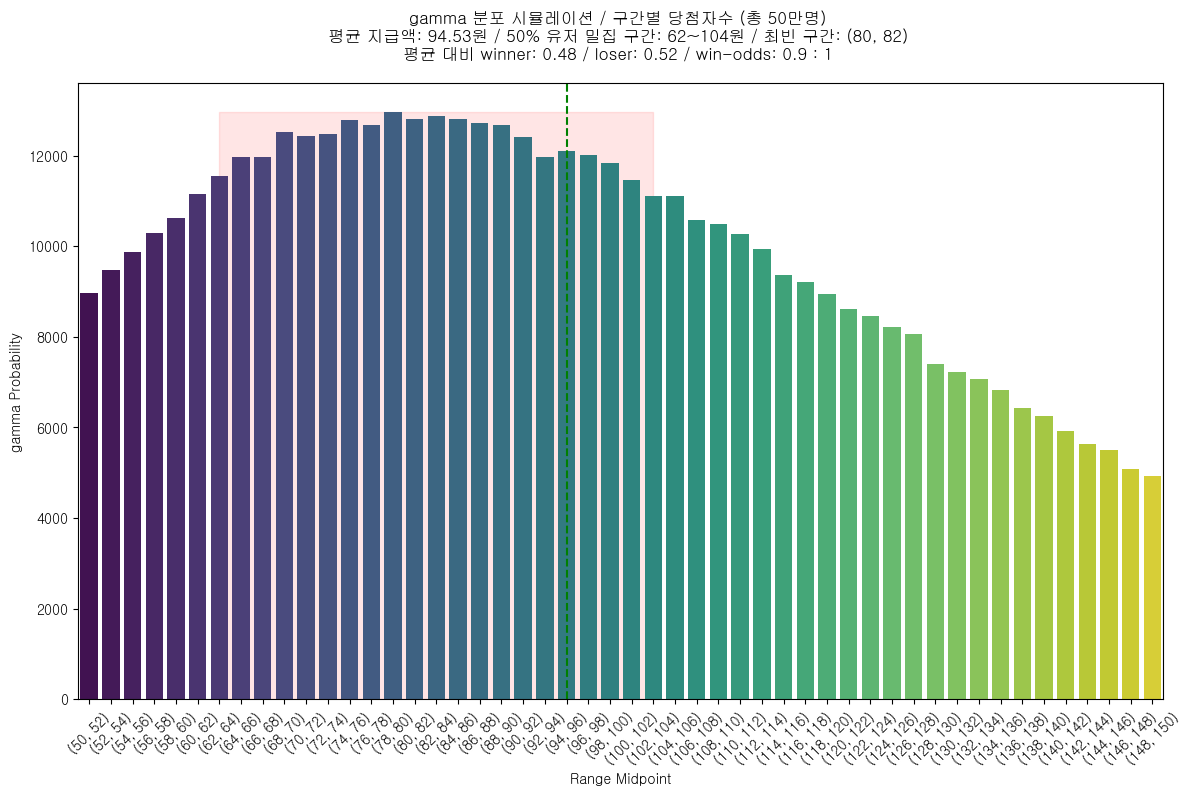

In [272]:
gotcha_game = Gotcha(start=50, end=150, interval_range=2, 
                     input_mean_value=100, #exp & all
                     num_simulations=500000,
                     alpha=5,#gamma
                     sigma=1 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'gamma'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)
    
# df

40
총 지급액:  45104350.0
총 시행:  500000.0
평균 지급액:  90.2087


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


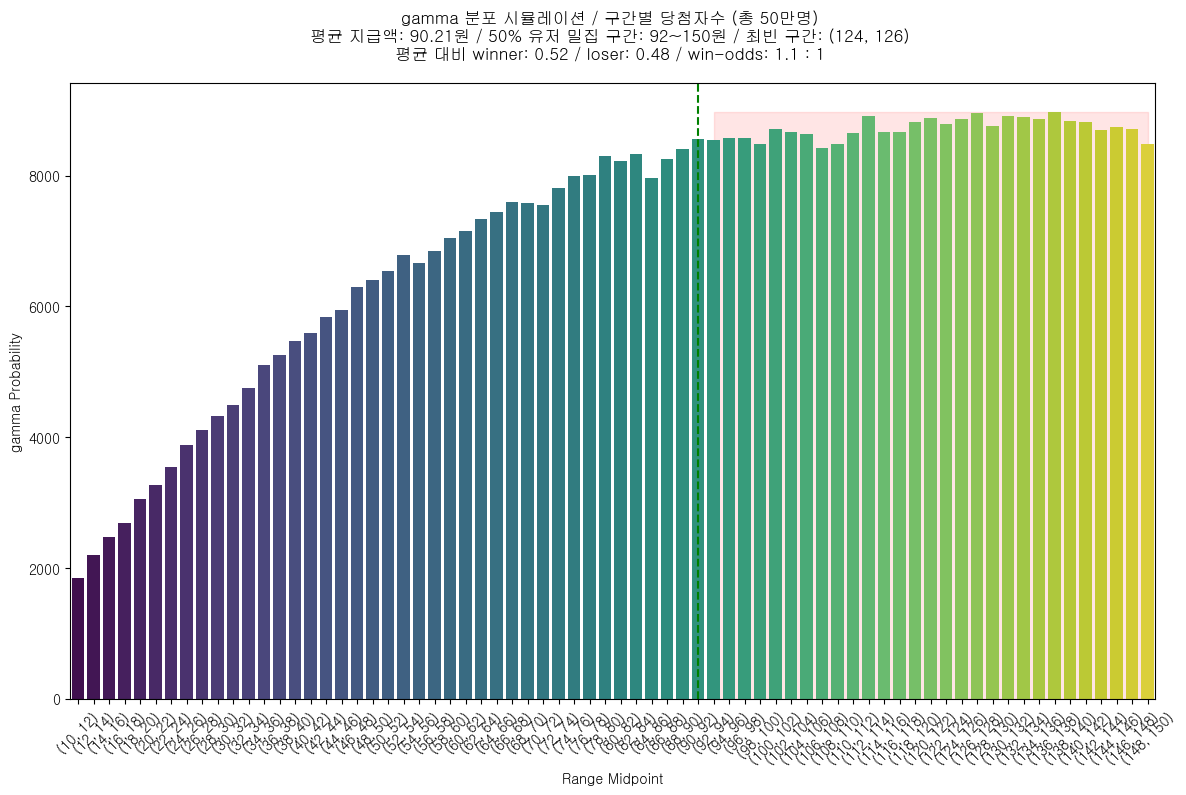

In [273]:
gotcha_game = Gotcha(start=10, end=150, interval_range=2, 
                     input_mean_value=250, #exp & all
                     num_simulations=500000,
                     alpha=2,#gamma
                     sigma=0.05 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'gamma'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)
    
# df

24
총 지급액:  29421586.0
총 시행:  500000.0
평균 지급액:  58.843172


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


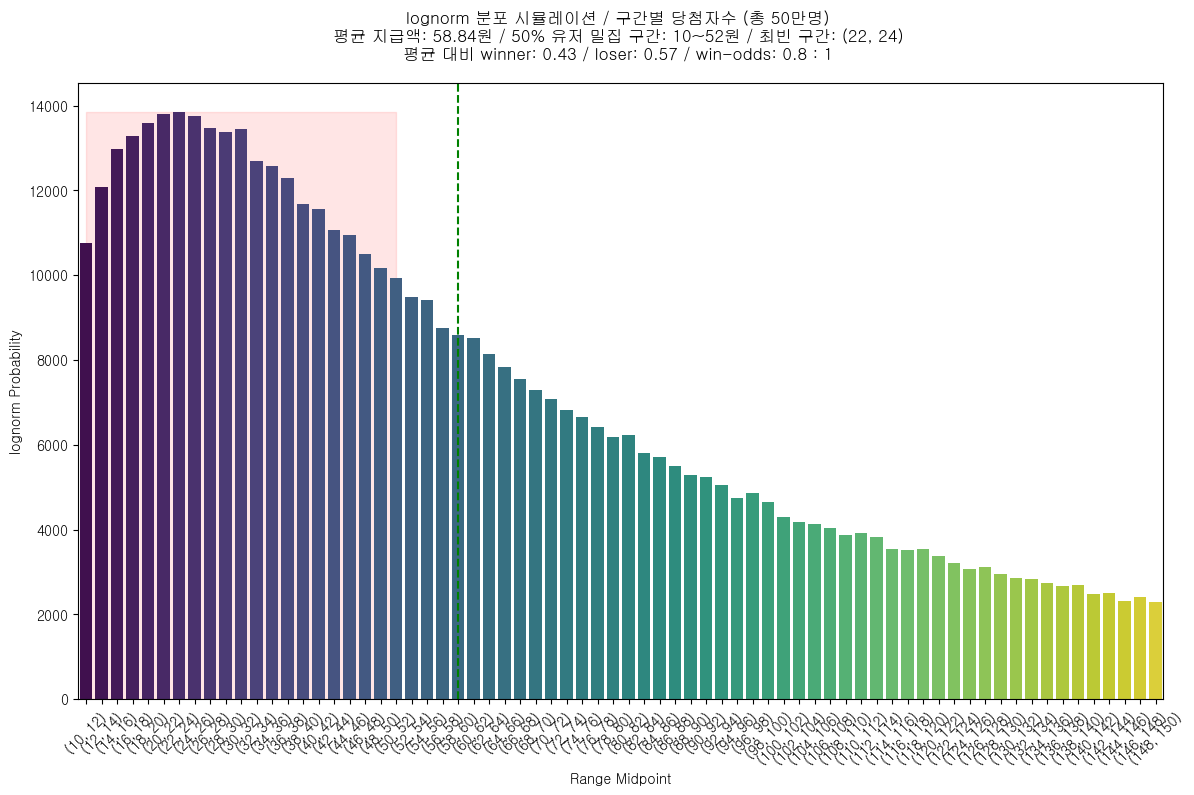

In [274]:
gotcha_game = Gotcha(start=10, end=150, interval_range=2, 
                     input_mean_value=100, #exp & all
                     num_simulations=500000,
                     alpha=5,#gamma
                     sigma=1 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'lognorm'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)


# df

23
총 지급액:  28999304.0
총 시행:  500000.0
평균 지급액:  57.998608


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp,gamma,lognorm,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(10, 12)",0.028527,0.000977,6.948928e-56,35.054411,0.0,0.0,0.0,11.0
1,"(12, 14)",0.027560,0.001651,7.667100e-46,36.284266,0.0,0.0,0.0,13.0
2,"(14, 16)",0.026626,0.002514,5.673915e-38,37.557270,0.0,0.0,0.0,15.0
3,"(16, 18)",0.025724,0.003547,1.137740e-31,38.874936,0.0,0.0,0.0,17.0
4,"(18, 20)",0.024852,0.004717,1.536686e-26,40.238832,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...
65,"(140, 142)",0.003033,0.000425,0.000000e+00,329.732187,0.0,0.0,0.0,141.0
66,"(142, 144)",0.002930,0.000378,0.000000e+00,341.300571,0.0,0.0,0.0,143.0
67,"(144, 146)",0.002831,0.000337,0.000000e+00,353.274822,0.0,0.0,0.0,145.0
68,"(146, 148)",0.002735,0.000299,0.000000e+00,365.669180,0.0,0.0,0.0,147.0


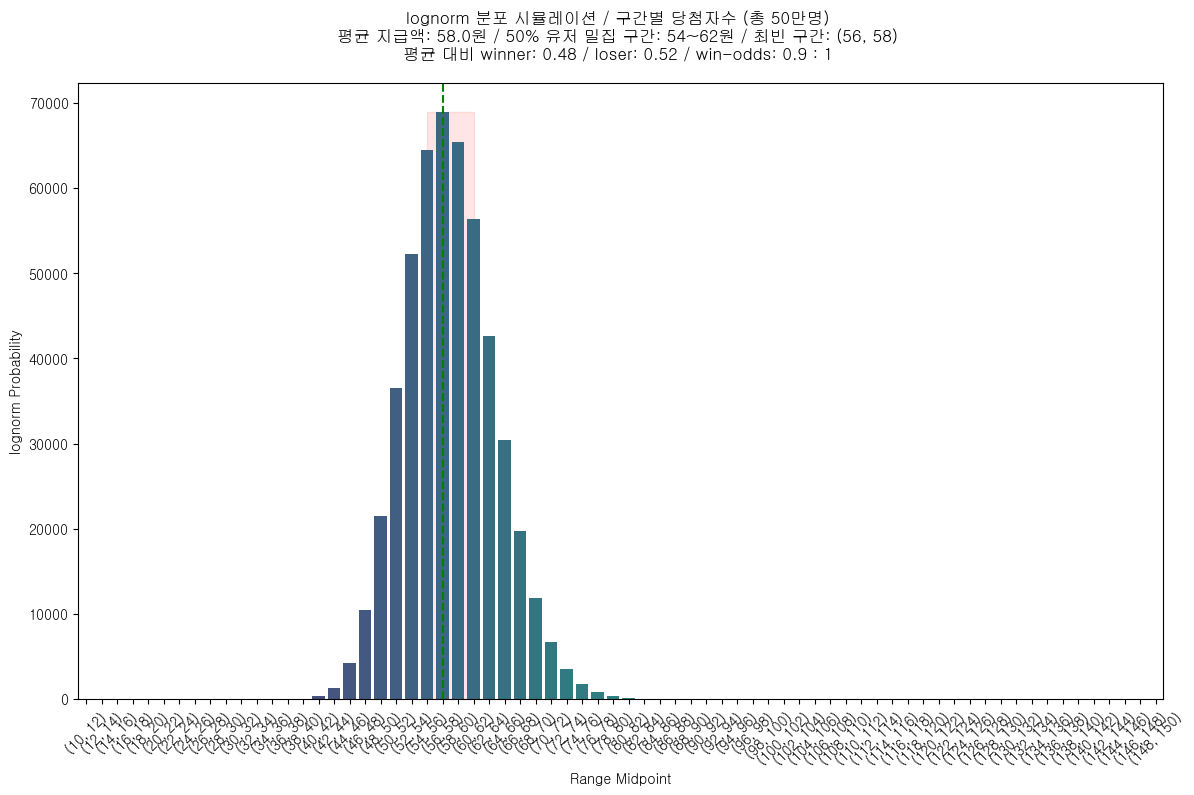

In [275]:
gotcha_game = Gotcha(start=10, end=150, interval_range=2, 
                     input_mean_value=58, #exp & all
                     num_simulations=500000,
                     alpha=5,#gamma
                     sigma=0.1 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'lognorm'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)


df

평균 150, 최대값 300

59
총 지급액:  15840186.0
총 시행:  100000.0
평균 지급액:  158.40186


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


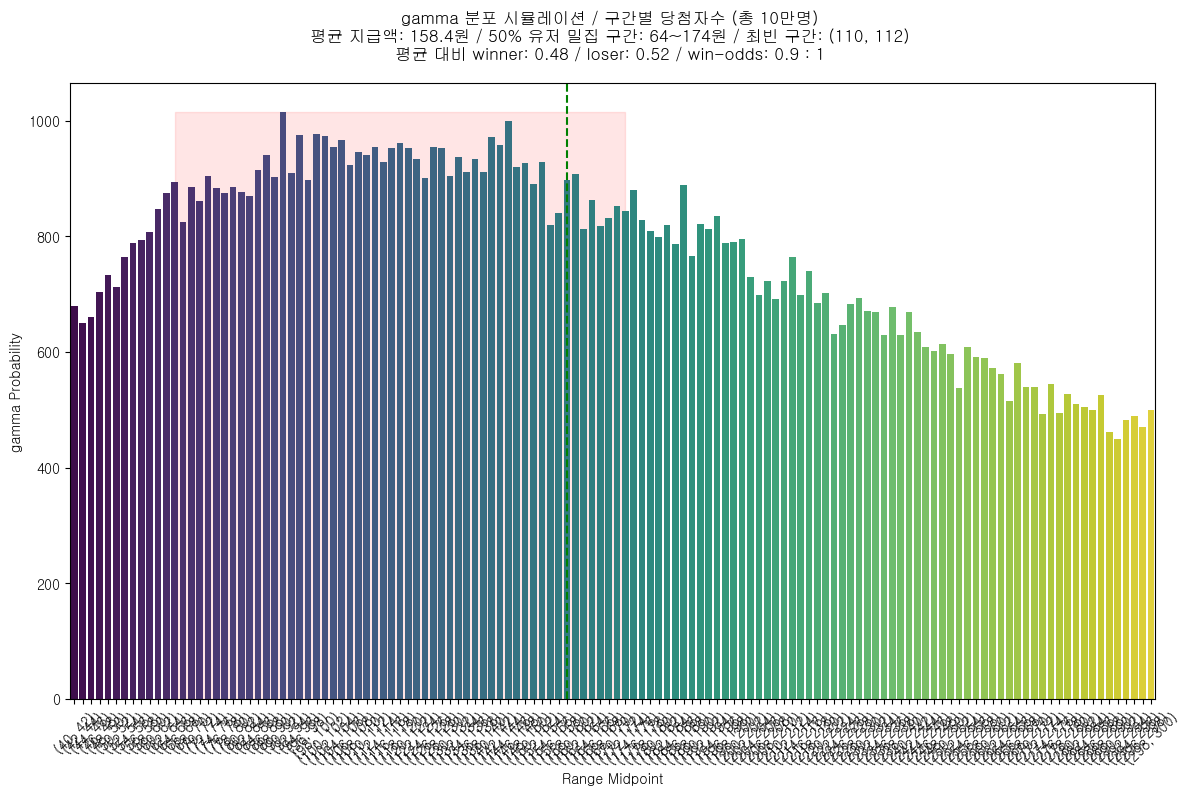

In [303]:
gotcha_game = Gotcha(start=40, end=300, interval_range=2, 
                     input_mean_value=220, #exp & all
                     num_simulations=100000,
                     alpha=2,#gamma
                     sigma=20 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'gamma'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)


# df

77
총 지급액:  79777324.0
총 시행:  500000.0
평균 지급액:  159.554648


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


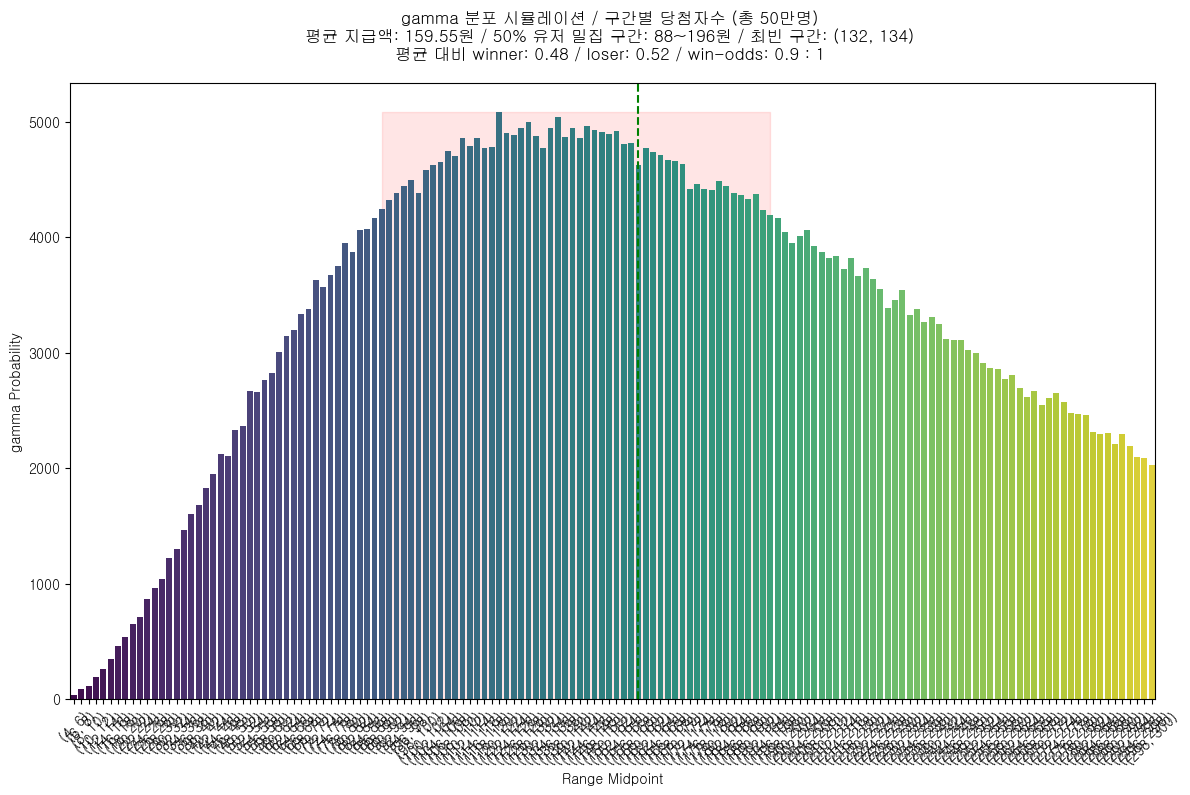

In [277]:
gotcha_game = Gotcha(start=4, end=300, interval_range=2, 
                     input_mean_value=200, #exp & all
                     num_simulations=500000,
                     alpha=3,#gamma
                     sigma=0.05 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'gamma'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)
    
# df

40
총 지급액:  45101488.0
총 시행:  500000.0
평균 지급액:  90.202976


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


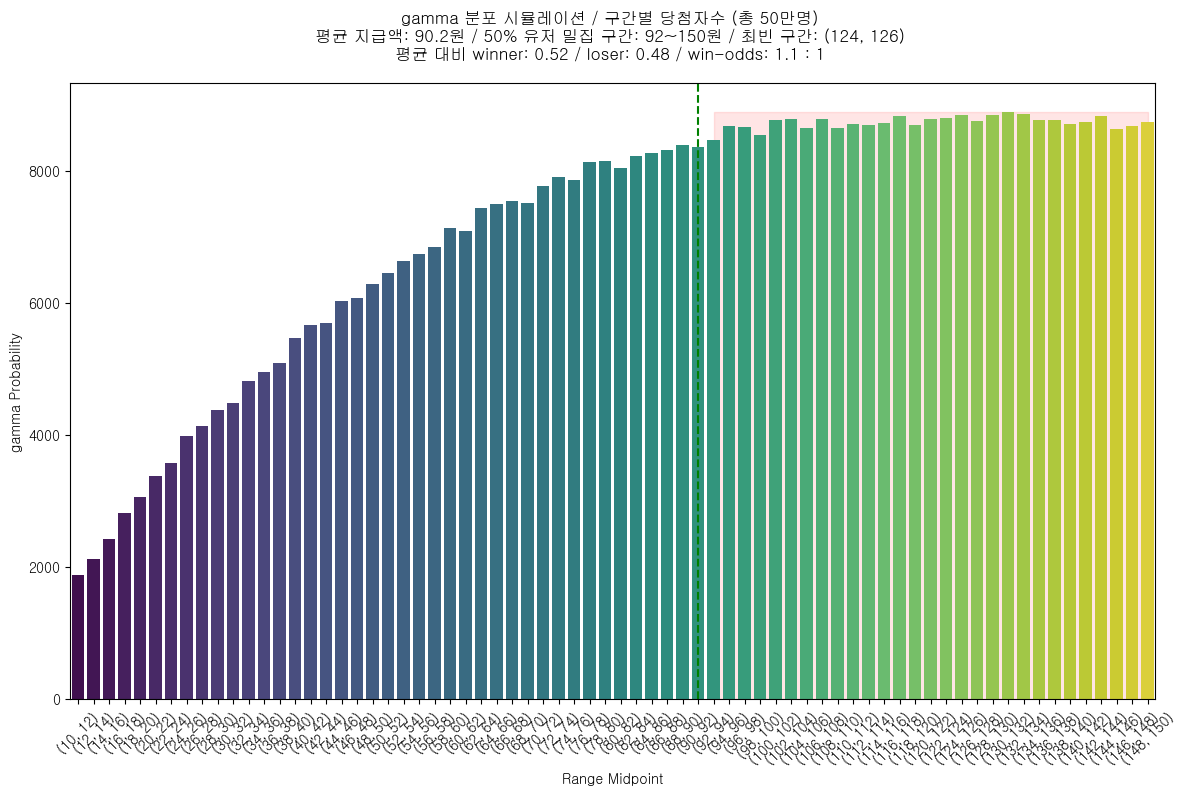

In [278]:
gotcha_game = Gotcha(start=10, end=150, interval_range=2, 
                     input_mean_value=250, #exp & all
                     num_simulations=500000,
                     alpha=2,#gamma
                     sigma=0.05 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'gamma'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)
    
# df

40
총 지급액:  45131390.0
총 시행:  500000.0
평균 지급액:  90.26278


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp,gamma,lognorm,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(10, 12)",0.007656,0.000618,0.000000e+00,130.622446,1964.0,0.003928,21604.0,11.0
1,"(12, 14)",0.007595,0.000724,0.000000e+00,131.671617,2194.0,0.004388,28522.0,13.0
2,"(14, 16)",0.007534,0.000826,0.000000e+00,132.729214,2386.0,0.004772,35790.0,15.0
3,"(16, 18)",0.007474,0.000925,0.000000e+00,133.795307,2838.0,0.005676,48246.0,17.0
4,"(18, 20)",0.007415,0.001021,0.000000e+00,134.869962,3076.0,0.006152,58444.0,19.0
...,...,...,...,...,...,...,...,...,...
65,"(140, 142)",0.004551,0.002922,7.260909e-30,219.710566,8791.0,0.017582,1239531.0,141.0
66,"(142, 144)",0.004515,0.002917,1.673837e-28,221.475300,8757.0,0.017514,1252251.0,143.0
67,"(144, 146)",0.004479,0.002911,3.422734e-27,223.254208,8782.0,0.017564,1273390.0,145.0
68,"(146, 148)",0.004444,0.002904,6.234904e-26,225.047405,8773.0,0.017546,1289631.0,147.0


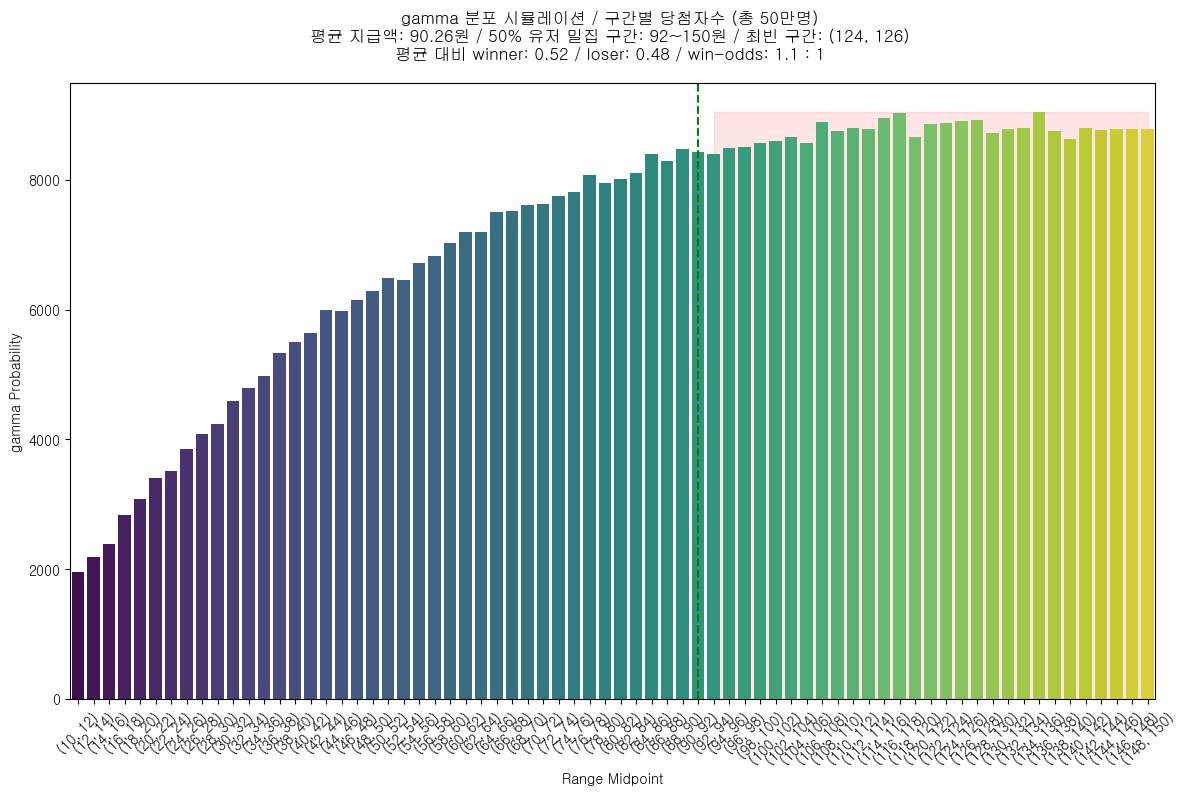

In [279]:
gotcha_game = Gotcha(start=10, end=150, interval_range=2, 
                     input_mean_value=250, #exp & all
                     num_simulations=500000,
                     alpha=2,#gamma
                     sigma=0.05 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'gamma'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)
    
df

그래프 추출

40
총 지급액:  45111508.0
총 시행:  500000.0
평균 지급액:  90.223016


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp,gamma,lognorm,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(10, 12)",0.007656,0.000618,0.000000e+00,130.622446,1841.0,0.003682,20251.0,11.0
1,"(12, 14)",0.007595,0.000724,0.000000e+00,131.671617,2158.0,0.004316,28054.0,13.0
2,"(14, 16)",0.007534,0.000826,0.000000e+00,132.729214,2500.0,0.005000,37500.0,15.0
3,"(16, 18)",0.007474,0.000925,0.000000e+00,133.795307,2745.0,0.005490,46665.0,17.0
4,"(18, 20)",0.007415,0.001021,0.000000e+00,134.869962,3114.0,0.006228,59166.0,19.0
...,...,...,...,...,...,...,...,...,...
65,"(140, 142)",0.004551,0.002922,7.260909e-30,219.710566,8670.0,0.017340,1222470.0,141.0
66,"(142, 144)",0.004515,0.002917,1.673837e-28,221.475300,8834.0,0.017668,1263262.0,143.0
67,"(144, 146)",0.004479,0.002911,3.422734e-27,223.254208,8690.0,0.017380,1260050.0,145.0
68,"(146, 148)",0.004444,0.002904,6.234904e-26,225.047405,8715.0,0.017430,1281105.0,147.0


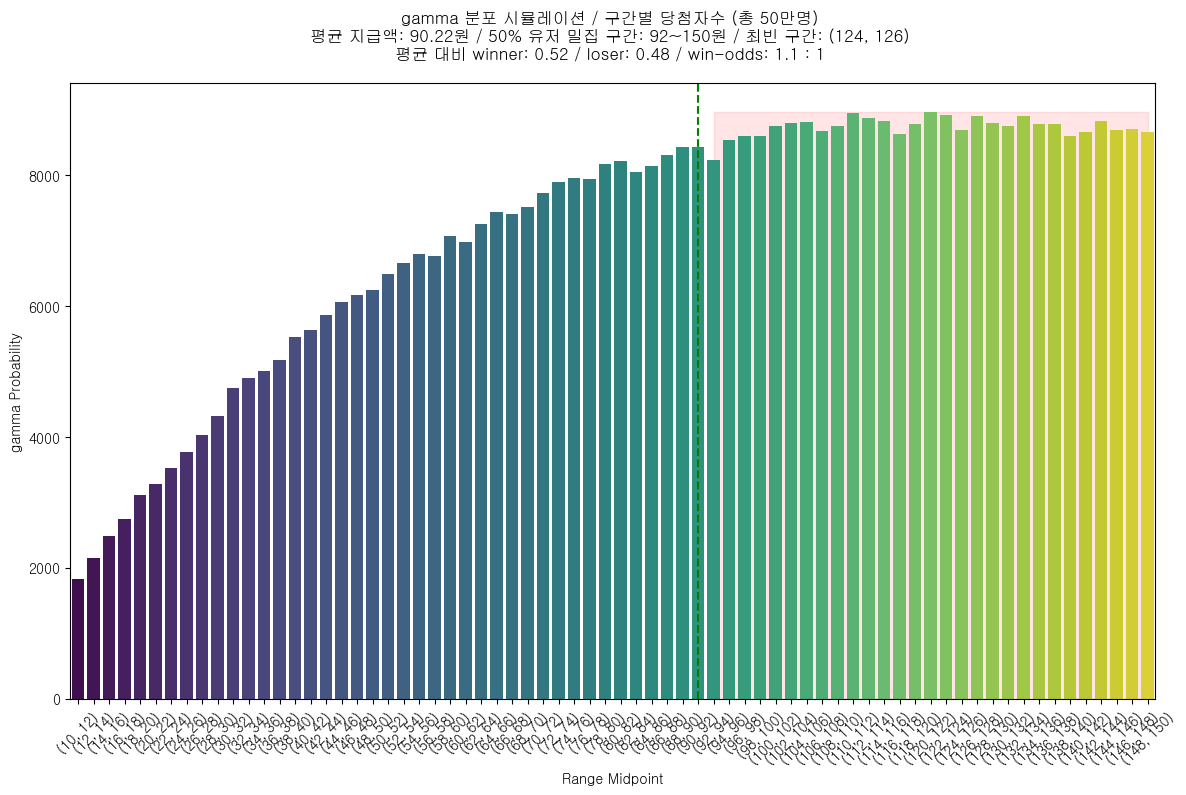

In [3]:
def get_graph():
    gotcha_game = Gotcha(start=10, end=150, interval_range=2, 
                        input_mean_value=250, #exp & all
                        num_simulations=500000,
                        alpha=2,#gamma
                        sigma=0.05 #log-norm
                        )

    profit_range = gotcha_game.set_range()
    exp_probability = gotcha_game.get_exp_distribution_probability()
    gamma_probability = gotcha_game.get_gamma_distribution_probability()
    lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
    num_of_trials_needs = gotcha_game.get_num_trials()

    #'exp', 'gamma','lognorm'
    sim_dist = 'gamma'
    win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

    df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)
    